<a href="https://colab.research.google.com/github/Ankit2759/ImageProcessing/blob/main/denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.filters import median
from skimage.morphology import disk
from scipy.signal import convolve2d




add random noise

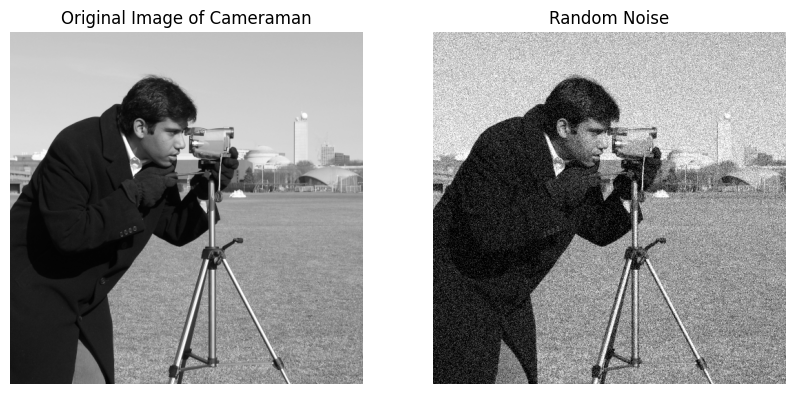

In [2]:
# Load the image (similar to 'cameraman.tif' in MATLAB)
I = img_as_float(data.camera())  # Cameraman image

# Add random Gaussian noise manually (std = 25/255)
noise = np.random.randn(*I.shape) * (25 / 255)
noisy_image = I + noise
noisy_image = np.clip(noisy_image, 0, 1)  # Keep pixel values valid

# Display images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title("Original Image of Cameraman")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Random Noise")
plt.axis('off')

plt.show()

Salt and pepper noise

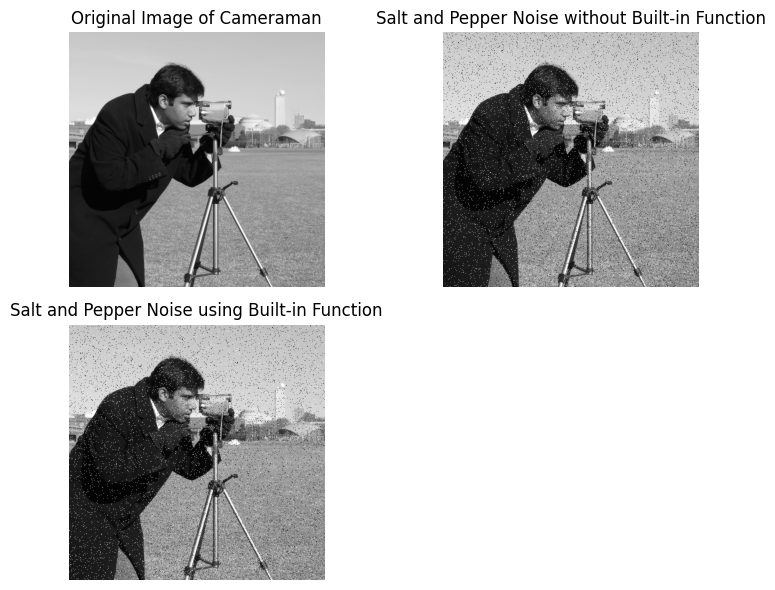

In [3]:
# Step 1: Read and display the image
A = img_as_float(data.camera())  # Cameraman image (grayscale)
r, c = A.shape

# Step 2: Define noise density
noise_density = 0.05  # 5% of pixels will be noisy
num_noisy_pixels = round(noise_density * r * c)

# Step 3: Copy the original image
noisy_img = np.copy(A)

# Step 4: Generate random pixel locations
rand_row = np.random.randint(0, r, num_noisy_pixels)
rand_col = np.random.randint(0, c, num_noisy_pixels)

# Step 5: Apply salt and pepper noise
for k in range(num_noisy_pixels):
    if np.random.rand() < 0.5:
        noisy_img[rand_row[k], rand_col[k]] = 0.0   # Pepper (black)
    else:
        noisy_img[rand_row[k], rand_col[k]] = 1.0   # Salt (white)
# Step 2: Add salt & pepper noise using built-in function
noise_density = 0.05  # 5% noise
noisy_img1 = random_noise(A, mode='s&p', amount=noise_density)


# Step 6: Display results
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Original Image of Cameraman')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Salt and Pepper Noise without Built-in Function')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(noisy_img1, cmap='gray')
plt.title('Salt and Pepper Noise using Built-in Function')
plt.axis('off')


plt.tight_layout()
plt.show()

Gaussian Noise

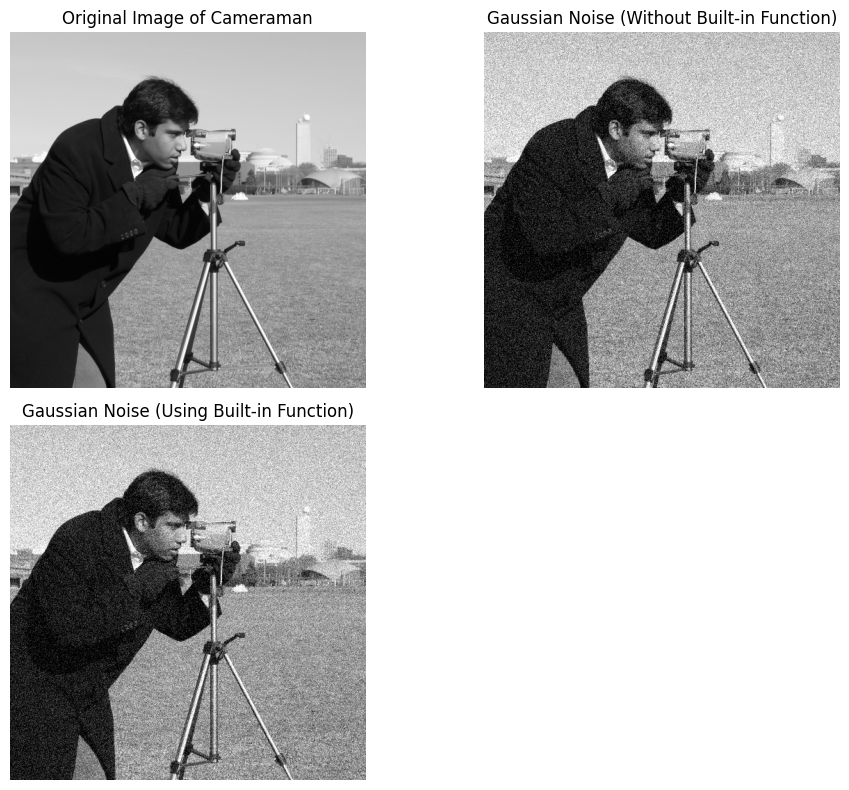

In [4]:
 # Step 1: Read and display the image
A = img_as_float(data.camera())  # Cameraman image (grayscale)
r, c = A.shape

# Step 2: Define mean and variance of Gaussian noise
mean_val = 0        # Mean (average intensity shift)
var_val = 0.01      # Variance (strength of noise)

# Step 3: Generate Gaussian noise
gaussian_noise = np.sqrt(var_val) * np.random.randn(r, c) + mean_val

# Step 4: Add noise to the image
noisy_img = A + gaussian_noise

# Step 5: Clip pixel values to keep them within [0, 1]
noisy_img = np.clip(noisy_img, 0, 1)

# Step 6: Add Gaussian noise using built-in function
gaussianNoise_builtin = random_noise(A, mode='gaussian', mean=0, var=var_val)

# Step 7: Display all images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Original Image of Cameraman')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Gaussian Noise (Without Built-in Function)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gaussianNoise_builtin, cmap='gray')
plt.title('Gaussian Noise (Using Built-in Function)')
plt.axis('off')

plt.tight_layout()
plt.show()


Speckle Noise Addition

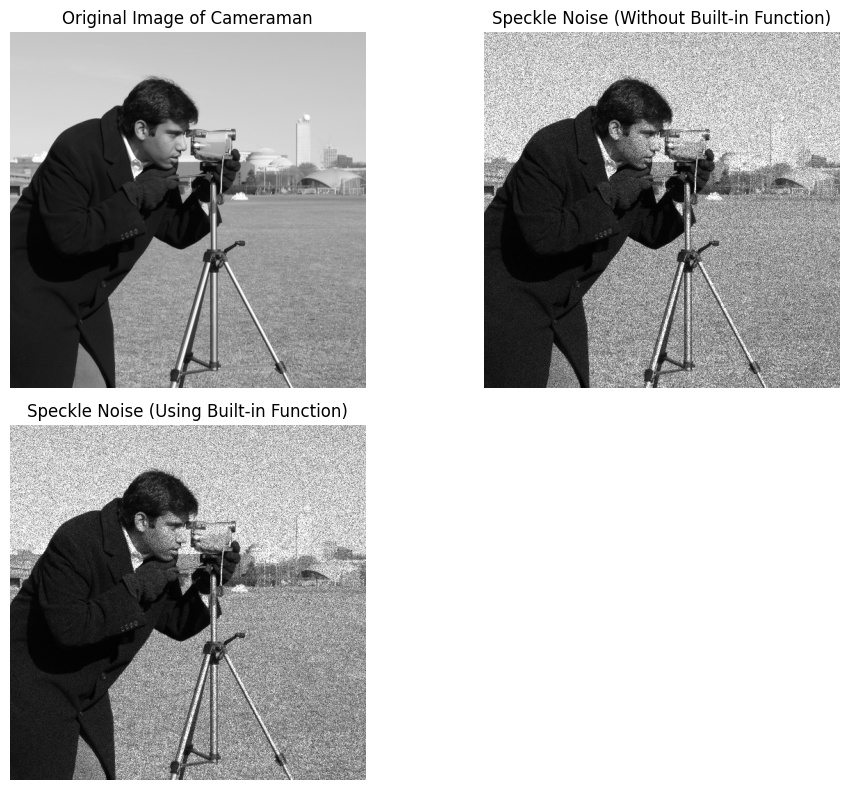

In [5]:
# Step 1: Read and display the image
A = img_as_float(data.camera())  # Cameraman image (grayscale)
r, c = A.shape

# Step 2: Define noise variance
var_val = 0.04  # Noise variance (adjust for more/less noise)

# Step 3: Generate multiplicative noise
# randn() gives random values from Gaussian distribution (mean=0, var=1)
noise = np.sqrt(var_val) * np.random.randn(r, c)

# Step 4: Apply multiplicative (speckle) noise
# Speckle noise model: g(x,y) = f(x,y) + f(x,y)*n(x,y)
noisy_img = A + A * noise

# Step 5: Clip values to valid range [0,1]
noisy_img = np.clip(noisy_img, 0, 1)

# Step 6: Add speckle noise using built-in function
speckleNoise_builtin = random_noise(A, mode='speckle', var=var_val)

# Step 7: Display results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Original Image of Cameraman')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Speckle Noise (Without Built-in Function)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(speckleNoise_builtin, cmap='gray')
plt.title('Speckle Noise (Using Built-in Function)')
plt.axis('off')

plt.tight_layout()
plt.show()


Median Filter

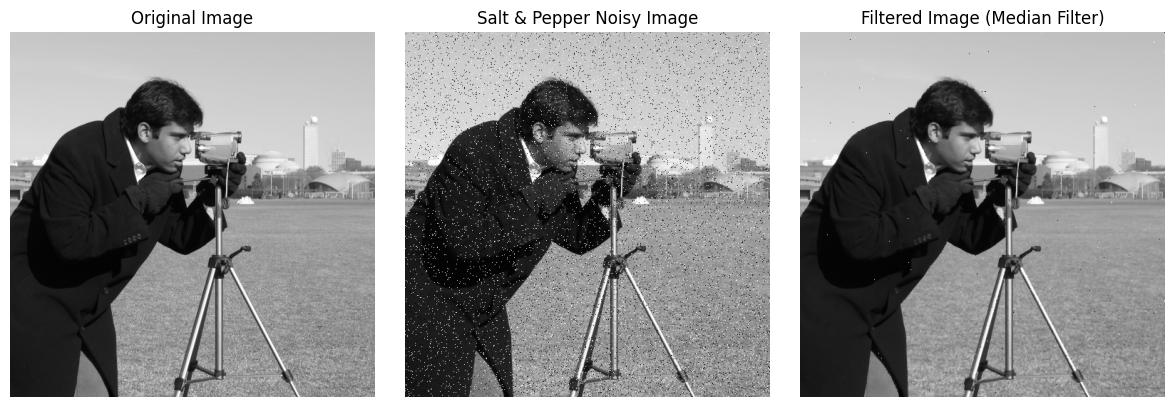

In [6]:
# Step 1: Read and display the image
I = img_as_float(data.camera())  # Cameraman image (grayscale)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Step 2: Add salt and pepper noise (Built-in function)
saltPepperNoise = random_noise(I, mode='s&p', amount=0.05)

plt.subplot(1, 3, 2)
plt.imshow(saltPepperNoise, cmap='gray')
plt.title("Salt & Pepper Noisy Image")
plt.axis('off')

# Step 3: Apply Median Filter (Built-in function)
K = median(saltPepperNoise, footprint=disk(1))  # disk(1) → 3x3 window

plt.subplot(1, 3, 3)
plt.imshow(K, cmap='gray')
plt.title("Filtered Image (Median Filter)")
plt.axis('off')

plt.tight_layout()
plt.show()


Average Filter

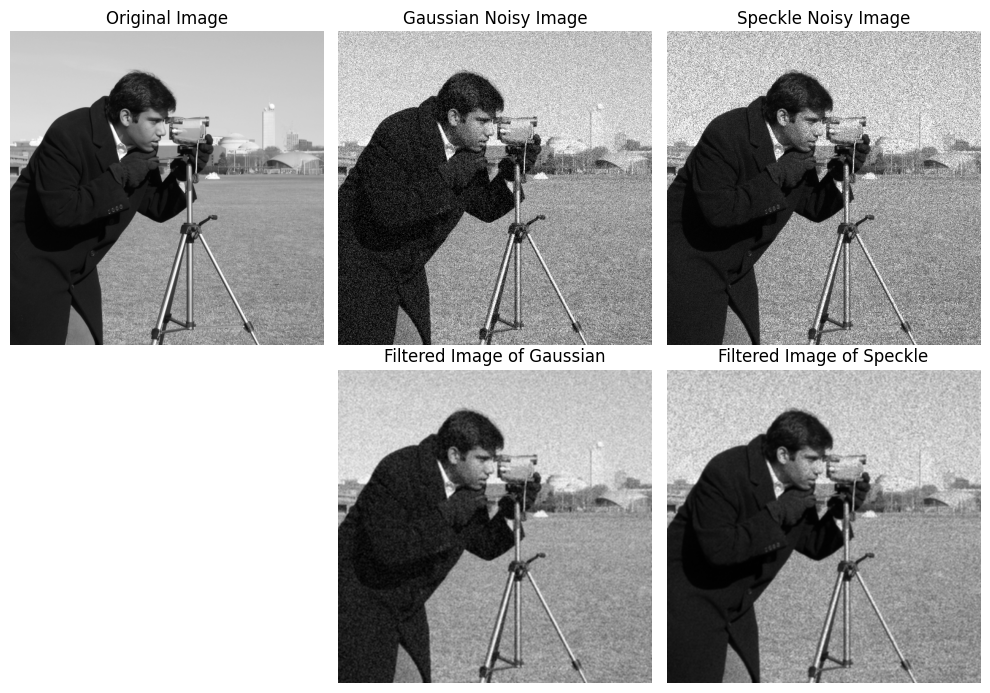

In [ ]:
# Step 1: Read the image
I = img_as_float(data.camera())  # Cameraman image (grayscale)

plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1)
plt.imshow(I, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Step 2: Add Gaussian noise
J = random_noise(I, mode='gaussian', mean=0, var=0.01)

plt.subplot(2, 3, 2)
plt.imshow(J, cmap='gray')
plt.title("Gaussian Noisy Image")
plt.axis('off')

# Step 3: Add Speckle noise
K = random_noise(I, mode='speckle', var=0.04)

plt.subplot(2, 3, 3)
plt.imshow(K, cmap='gray')
plt.title("Speckle Noisy Image")
plt.axis('off')

# Step 4: Define 3x3 Average Filter
h = np.ones((3, 3)) / 9

# Step 5: Apply filter to Gaussian noisy image
L = convolve2d(J, h, mode='same', boundary='symm')

plt.subplot(2, 3, 5)
plt.imshow(L, cmap='gray')
plt.title("Filtered Image of Gaussian")
plt.axis('off')

# Step 6: Apply filter to Speckle noisy image
M = convolve2d(K, h, mode='same', boundary='symm')

plt.subplot(2, 3, 6)
plt.imshow(M, cmap='gray')
plt.title("Filtered Image of Speckle")
plt.axis('off')

plt.tight_layout()
plt.show()
